In [1]:
import sys
from pathlib import Path

# ノートブックのカレントディレクトリを確認して、project root を推定する
print("cwd:", Path.cwd())
proj_root = Path.cwd().parents[1]  # notebook/eda -> ../.. がリポジトリルート
print("project root guessed:", proj_root)

# 先頭に挿入して import の優先検索先にする
sys.path.insert(0, str(proj_root))

# 動作確認
import importlib

try:
    import src.utils.paths as _p

    importlib.reload(_p)
    print("src is importable:", _p)
except Exception as e:
    print("import failed:", e)

cwd: /home/ach18195zv/workspace/visu/notebook/eda
project root guessed: /home/ach18195zv/workspace/visu
src is importable: <module 'src.utils.paths' from '/home/ach18195zv/workspace/visu/src/utils/paths.py'>


In [2]:
import json

import matplotlib.pyplot as plt

from src.utils.image_processor import ImageProcessor as ip
from src.utils.paths import ORIGINAL_ROOT

In [3]:
incorrect_pos = "pos2"

In [4]:
incorrect_path = (
    ORIGINAL_ROOT / "text_option" / incorrect_pos / "incorrect_options_3.jsonl"
)
with open(incorrect_path) as f:
    data = [json.loads(line) for line in f]

In [5]:
data[0].keys()

dict_keys(['story_id', 'image_ids', 'texts', 'target_pos', 'num_incorrect_options', 'incorrect_options'])

In [6]:
def show_images(image_ids):
    fig, axes = plt.subplots(1, len(image_ids), figsize=(20, 5))
    for ax, image_id in zip(axes, image_ids):
        image = ip.load_image(image_id)
        ax.imshow(image)
        ax.axis("off")
    plt.show()

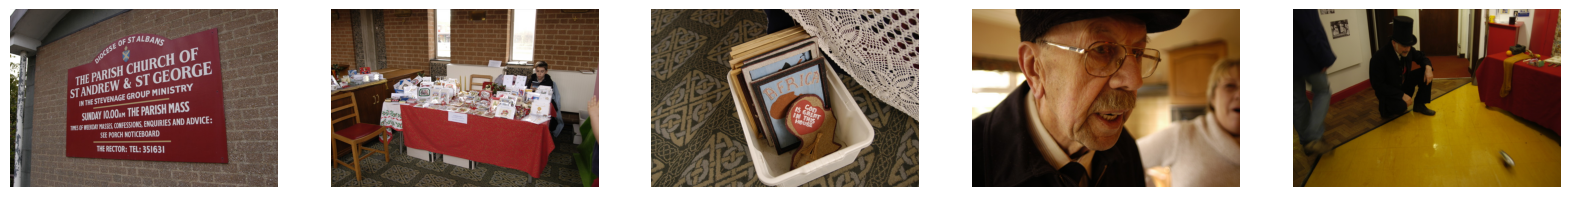

<<<Original Case>>>
0: the local parish holds a craft show each year .
1: lots of folks come out and set up tables to sell their crafts .
2: some of these crafts are very unique and take a lot of talent to make .
3: folks of all ages come out to peruse the crafts for sale .
4: some of the crafters even dress up in unique costumes as part of their selling act .




===Incorrect Case1===
0: the local parish holds a craft show each year .
1: lots of folks come out and set up tables to sell their crafts .
2: A local artist demonstrates a painting technique that draws a small crowd.
3: folks of all ages come out to peruse the crafts for sale .
4: some of the crafters even dress up in unique costumes as part of their selling act .




===Incorrect Case2===
0: the local parish holds a craft show each year .
1: lots of folks come out and set up tables to sell their crafts .
2: Children gather around a table where colorful beads are being strung into necklaces.
3: folks of all ages come out to 

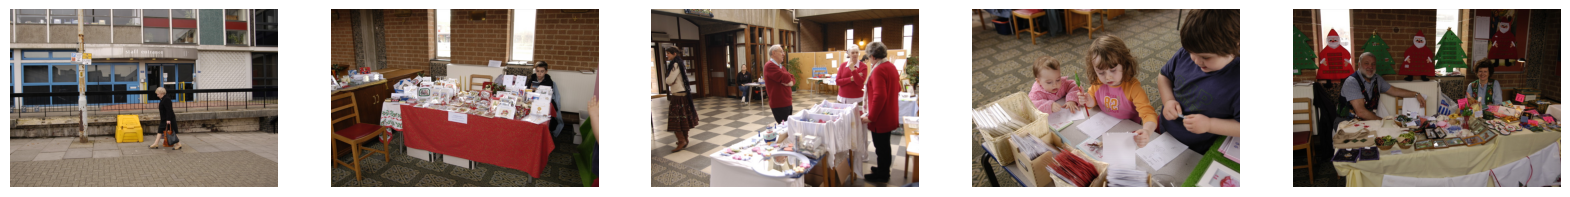

<<<Original Case>>>
0: i was so excited to be heading to the crafts fair .
1: when i arrived i saw a great booth with a variety of great crafts .
2: i stopped at chatted at my friend [female] 's booth for a bit .
3: there were even booths set up for all of the kids .
4: i found some awesome crafts at the fair , i 'm really happy that i went .




===Incorrect Case1===
0: i was so excited to be heading to the crafts fair .
1: when i arrived i saw a great booth with a variety of great crafts .
2: i admired the intricate jewelry displayed at the next booth.
3: there were even booths set up for all of the kids .
4: i found some awesome crafts at the fair , i 'm really happy that i went .




===Incorrect Case2===
0: i was so excited to be heading to the crafts fair .
1: when i arrived i saw a great booth with a variety of great crafts .
2: i noticed a group of people gathered around a pottery demonstration.
3: there were even booths set up for all of the kids .
4: i found some awesome craf

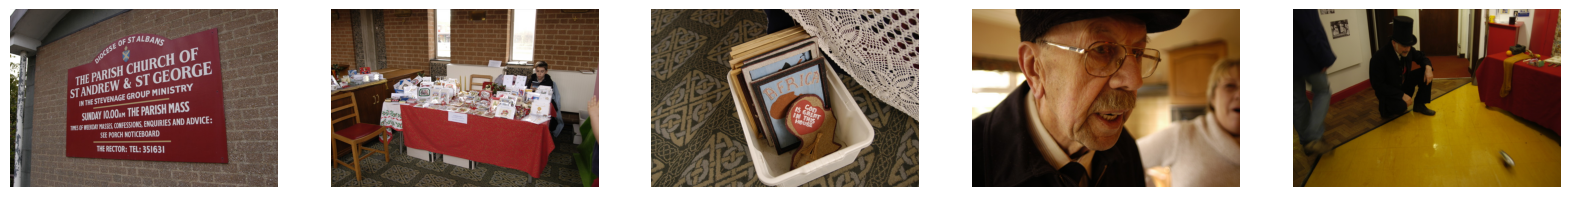

<<<Original Case>>>
0: the church is old , but it has a nice history .
1: they display this history during the afternoon .
2: some books even talk about location .
3: the older members of the church remember these things .
4: it makes them sad .




===Incorrect Case1===
0: the church is old , but it has a nice history .
1: they display this history during the afternoon .
2: A map on the wall highlights the church's founding year.
3: the older members of the church remember these things .
4: it makes them sad .




===Incorrect Case2===
0: the church is old , but it has a nice history .
1: they display this history during the afternoon .
2: A collection of vintage postcards is displayed prominently.
3: the older members of the church remember these things .
4: it makes them sad .




===Incorrect Case3===
0: the church is old , but it has a nice history .
1: they display this history during the afternoon .
2: An old photograph shows the church surrounded by fields.
3: the older members

In [7]:
incorrect_path = (
    ORIGINAL_ROOT / "text_option" / incorrect_pos / "incorrect_options_3.jsonl"
)
with open(incorrect_path) as f:
    data = [json.loads(line) for line in f]

for item in data[:3]:
    num_incorrect_options = item["num_incorrect_options"]
    pos = item["target_pos"]
    texts = item["texts"]
    incorrect_options = item["incorrect_options"]
    show_images(item["image_ids"])
    for j in range(num_incorrect_options + 1):
        if j == 0:
            print("<<<Original Case>>>")
        if j != 0:
            texts[pos] = incorrect_options[j - 1]
            print(f"===Incorrect Case{j}===")

        for i, text in enumerate(texts):
            print(f"{i}: {text}")
        print("\n\n\n")

    print("=" * 200)
    print("=" * 200)
    print("=" * 200)